# CKP8277 - APRENDIZAGEM AUTOMATICA 2017.2

Aluno: Felipe Zschornack Rodrigues Saraiva - 396903

# Redes Neurais
## Classificação utilizando MLP

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
import math
from io import StringIO  # Python3
import sys

In [2]:
features = pd.read_csv('ex3data1_X.txt', sep=' ', header=None)
labels = pd.read_csv('ex3data1_T.txt', sep=' ', header=None)
data = pd.concat([features, labels], axis=1, ignore_index=True)
# data = data.sample(frac=1).reset_index(drop=True) # shuffle
data.head()

,0,1,2,3,4,5,6,7,8,9,...,400,401,402,403,404,405,406,407,408,409
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
train_list = []
test_list = []

for i in range(10):
    train_list.append(data.iloc[i*500 : i*500 + 450])
    test_list.append(data.iloc[i*500 + 450 : i*500 + 500])

train = pd.concat(train_list)
test = pd.concat(test_list)

train.head()

,0,1,2,3,4,5,6,7,8,9,...,400,401,402,403,404,405,406,407,408,409
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(100), 
                    activation='logistic', 
                    learning_rate_init=0.3, 
                    solver='sgd', 
                    max_iter=500, 
                    alpha=0, 
                    shuffle=False, 
                    verbose=500, 
                    validation_fraction=0.1, 
                    early_stopping=True)

mlp.fit(train.iloc[:, :400], train.iloc[:, 400:])

Iteration 1, loss = 3.99651326
Validation score: 0.000000
Iteration 2, loss = 2.41861040
Validation score: 0.364444
Iteration 3, loss = 1.47182554
Validation score: 0.620000
Iteration 4, loss = 1.00615274
Validation score: 0.737778
Iteration 5, loss = 0.78050620
Validation score: 0.804444
Iteration 6, loss = 0.65194548
Validation score: 0.808889
Iteration 7, loss = 0.57556251
Validation score: 0.813333
Iteration 8, loss = 0.52377520
Validation score: 0.828889
Iteration 9, loss = 0.48555921
Validation score: 0.846667
Iteration 10, loss = 0.44855021
Validation score: 0.846667
Iteration 11, loss = 0.42015840
Validation score: 0.862222
Iteration 12, loss = 0.39497288
Validation score: 0.857778
Iteration 13, loss = 0.37151568
Validation score: 0.864444
Iteration 14, loss = 0.35473148
Validation score: 0.871111
Iteration 15, loss = 0.33491034
Validation score: 0.864444
Iteration 16, loss = 0.32234912
Validation score: 0.871111
Iteration 17, loss = 0.30593094
Validation score: 0.875556
Iterat

MLPClassifier(activation='logistic', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.3, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=False, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=500, warm_start=False)

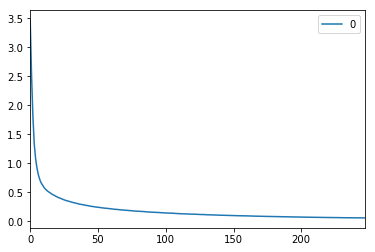

In [5]:
# precisei salvar a saída acima em dois '.txt' (epoch_loss e validation_score)
epoch_loss = pd.read_csv('epoch_loss.txt', header=None)
epoch_loss.plot()

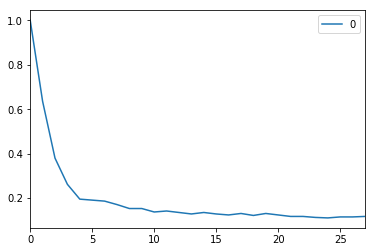

In [40]:
validation_error = pd.read_csv('validation_score.txt', header=None)
validation_error = validation_error.apply(lambda x: 1 - x)
validation_error.plot()

In [39]:
mlp.score(test.iloc[:,:400], test.iloc[:,400:])

0.90000000000000002

O erro no conjunto de treinamento continua diminuindo após 200+ épocas, porém o erro no conjunto de validação diminui até a época 25 e depois começa a aumentar. Isso indica que após a época 25 o modelo começa a sofrer overfitting nos dados de treinamento e, portanto, o treinamento deve ser parado na época 25.

In [92]:
data2 = pd.read_csv('ex3data2.txt', header=None, sep=' ')
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [34]:
# standardize data
df_x = data2.iloc[:,:13]
df_y = data2.iloc[:,13]

scaler = StandardScaler().fit(df_x)
df_x = pd.DataFrame(scaler.transform(df_x))

data2 = pd.concat([df_x, df_y], axis=1)
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [58]:
data2 = data2.sample(frac=1).reset_index(drop=True) # shuffle

train = data2.iloc[:406]
test = data2.iloc[406:]

train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.418126,3.160441,-1.516987,-0.272599,-1.249924,0.140137,-1.169050,2.563455,-0.867883,-0.565640,-0.534275,0.441052,-0.964825,24.7
1,-0.207116,-0.487722,1.231945,3.668398,0.434551,2.161728,1.053485,-0.833960,-0.523001,-0.031105,-1.736418,0.361122,-1.504494,50.0
2,-0.403217,-0.487722,-0.375976,-0.272599,-0.299707,0.630220,0.402727,-0.483566,-0.523001,-0.143951,1.130230,0.417588,-0.453191,27.5
3,-0.402961,-0.487722,2.422565,-0.272599,0.469104,-1.183370,0.857902,-0.938447,-0.637962,1.798194,0.760340,0.421206,0.757911,15.2
4,-0.413480,-0.487722,-1.266023,-0.272599,-0.576134,-0.187534,0.008005,-0.244978,-0.752922,-1.278354,-0.303094,0.333711,0.069658,29.6


In [79]:
mlp = MLPRegressor(hidden_layer_sizes=(64), 
                    activation='logistic', 
                    learning_rate_init=0.0001, 
                    solver='sgd', 
                    max_iter=2000, 
                    alpha=0, 
                    shuffle=False, 
                    verbose=True,
                    validation_fraction=0.1, 
                    early_stopping=True)

mlp.fit(train.iloc[:, :13], train.iloc[:, 13])

Iteration 1, loss = 288.60702731
Validation score: -5.977450
Iteration 2, loss = 284.17242146
Validation score: -5.826353
Iteration 3, loss = 277.52021630
Validation score: -5.632096
Iteration 4, loss = 269.17677001
Validation score: -5.406930
Iteration 5, loss = 259.66760490
Validation score: -5.160593
Iteration 6, loss = 249.41504233
Validation score: -4.901037
Iteration 7, loss = 238.62225036
Validation score: -4.635088
Iteration 8, loss = 227.59255316
Validation score: -4.367818
Iteration 9, loss = 216.61602528
Validation score: -4.102868
Iteration 10, loss = 205.61408129
Validation score: -3.843661
Iteration 11, loss = 195.07262739
Validation score: -3.591597
Iteration 12, loss = 184.79635917
Validation score: -3.348654
Iteration 13, loss = 174.91767358
Validation score: -3.115973
Iteration 14, loss = 165.46012280
Validation score: -2.894289
Iteration 15, loss = 156.43704720
Validation score: -2.684035
Iteration 16, loss = 147.87815263
Validation score: -2.485279
Iteration 17, los

MLPRegressor(activation='logistic', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=64, learning_rate='constant',
       learning_rate_init=0.0001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=False, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

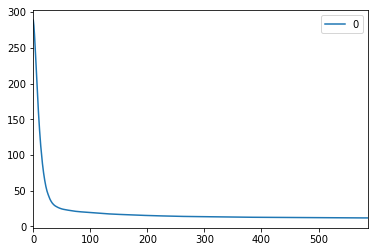

In [80]:
epoch_loss = pd.read_csv('epoch_loss2.txt', header=None)
epoch_loss.plot()

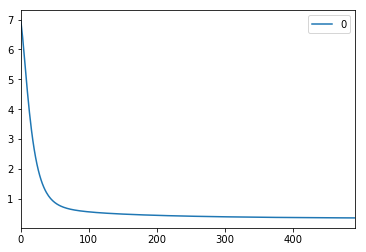

In [81]:
validation_error = pd.read_csv('validation_score2.txt', header=None)
validation_error = validation_error.apply(lambda x: 1 - x)
validation_error.plot()

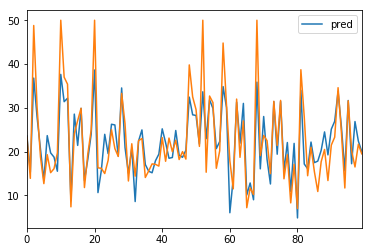

In [91]:
predictions = mlp.predict(test.iloc[:,:13])
pd.DataFrame(predictions, columns=['pred']).plot()
test.iloc[:,13].reset_index(drop=True).plot()